# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [34]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [22]:
#  1. Get the total rides for each city type
type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [67]:
# 2. Get the total drivers for each city type
type_driver_sum = city_data_df.groupby(["type"]).sum()["driver_count"]
type_driver_sum

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [26]:
#  3. Get the total amount of fares for each city type
type_fare_sum = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fare_sum

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [61]:
#  4. Get the average fare per ride for each city type. 
type_avg_fare_per_ride = type_fare_sum / type_ride_count
type_avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [62]:
# 5. Get the average fare per driver for each city type. 
type_avg_fare_per_driver = type_fare_sum / type_driver_sum
type_avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [71]:
#  6. Create a PyBer summary DataFrame. 
summary_data = {
    'Total Rides': type_ride_count,
    'Total Drivers': type_driver_sum,
    'Total Fares': type_fare_sum,
    'Average Fare per Ride': type_avg_fare_per_ride,
    'Average Fare per Driver': type_avg_fare_per_driver,
}
pyber_summary_df = pd.concat(summary_data, axis=1)
pyber_summary_df

,Average Fare per Driver,Average Fare per Ride,Total Drivers,Total Fares,Total Rides
type,,,,,
Rural,55.486282,34.623440,78,4327.93,125
Suburban,39.502714,30.970128,490,19356.33,625
Urban,16.571468,24.525772,2405,39854.38,1625


In [72]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [73]:
#  8. Format the columns.
pyber_summary_df

,Average Fare per Driver,Average Fare per Ride,Total Drivers,Total Fares,Total Rides
Rural,55.486282,34.623440,78,4327.93,125
Suburban,39.502714,30.970128,490,19356.33,625
Urban,16.571468,24.525772,2405,39854.38,1625


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [76]:
# 1. Read the merged DataFrame
df = pyber_data_df.groupby(['type', 'date'])['fare'].sum()
df.head()

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [81]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.


In [80]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
df = df.reset_index()
df.head()

,level_0,index,type,date,fare
0,0,0,Rural,2019-01-01 09:45:36,43.69
1,1,1,Rural,2019-01-02 11:18:32,52.12
2,2,2,Rural,2019-01-03 19:51:01,19.90
3,3,3,Rural,2019-01-04 03:31:26,24.88
4,4,4,Rural,2019-01-06 07:38:40,47.33


In [83]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot = df.pivot(index = 'date', columns ='type', values='fare')
pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [86]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

dates = pivot.loc['2019-01-01':'2019-04-29']
dates.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [87]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
dates.index = pd.to_datetime(dates.index)

In [88]:
# 7. Check that the datatype for the index is datetime using df.info()
dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
Rural       114 non-null float64
Suburban    573 non-null float64
Urban       1509 non-null float64
dtypes: float64(3)
memory usage: 68.6 KB


In [92]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resample = dates.resample('W').sum()
resample.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


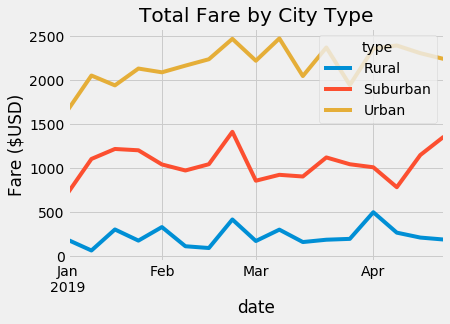

In [111]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig = resample.plot()
fig.set_ylabel('Fare ($USD)')
fig.set_title('Total Fare by City Type')

plt.savefig('PyBer_fare_summary.png')